# Numerical Optimization (CS215300) Assignment 2
## Introduction
In this assignment, we expect you to be familiar with the Pytorch optimizer library. We are using the Rosenbrock function as the benchmark of our optimization algorithms again. Since this is a simple test on very small scale, CUDA is not needed. You need to install Pytorch to acquire the pre-defined optimizers.  
The library document link: https://pytorch.org/docs/stable/optim.html

## Task
1. Please try different optimizers and observe the behavior of them, and try different hyperparameters and observe if they behave differently. (In case of L-BFGS, the parameters wrapped in this sample code won't work. If you want to try it anyway, you will need to write your own code.)
2. Whether if your setting converges or not, please justify it by experiment or your hyperthesis.
3. PLease answer the following question in your report:  
    (a) What is the relation between SGD and GD(gradient descent) in our case, i.e. when the input is one-dimensional?  
    (b) Have you found effective way to set hyperparameters so they can iterate faster toward the minimum point?
4. Please write a concise report about your experiments and analysis. If you need to plot tables, please check the following link: https://www.tablesgenerator.com/markdown_tables

##  Advanced Technique: Learning rate scheduler
Another technique to find hyperparameter for learning rate is to perform scheduled adjestments of learning rate. This is called 'learning rate scheduler'. The adjestments here not only affected by current learning rate and momentum etc., but also the epoch number or step numbers. Usually, in these kind of method, we are presuming the optimal hyperparameters can be found by recognizing certain patterns, and we schedule the experiments to search the proper parameters in such manner. You can also apply these function in your code. The library document of learning rate scheduler is in the same link above.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


In [2]:
def rosenbrock(tensor):
    # since pytorch uses tensor, we don't use built-in function here
    x, y = tensor
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

def execute_steps(func, initial_state, optimizer_class, optimizer_config, num_iter=500):
    x = torch.Tensor(initial_state).requires_grad_(True)
    optimizer = optimizer_class([x], **optimizer_config)
    steps = []
    steps = np.zeros((2, num_iter))
    steps[:, 0] = np.array(initial_state)
    last_f = torch.tensor([100., 100.])
    for i in range(0, num_iter):
        optimizer.zero_grad()
        f = func(x)
        f.backward(create_graph=True, retain_graph=True)
        torch.nn.utils.clip_grad_norm_(x, 1.0)
        optimizer.step()
        steps[:, i] = x.detach().numpy()
    return steps

def plot_rosenbrok(grad_iter, optimizer_name):
    x = np.linspace(-2, 2, 250)
    y = np.linspace(-1, 3, 250)
    minimum = (1.0, 1.0)

    X, Y = np.meshgrid(x, y)
    Z = rosenbrock([X, Y])

    iter_x, iter_y = grad_iter[0, :], grad_iter[1, :]

    fig = plt.figure(figsize=(8, 8))

    ax = fig.add_subplot(1, 1, 1)
    ax.contour(X, Y, Z, 90, cmap='jet')
    ax.plot(iter_x, iter_y, color='r', marker='x')

    ax.set_title('{} with {} iterations'.format(optimizer_name, len(iter_x)))
    plt.plot(*minimum, 'gD')
    plt.plot(iter_x[-1], iter_y[-1], 'rD')
    plt.show()

In [3]:
def printX(steps):
    iter_x, iter_y = steps[0, :], steps[1, :]
    i=0
    for x,y in zip(iter_x,iter_y):
        print("iteration %d: [%.4f %.4f]" %(i,x,y))
        i+=1

## Original setting

In [4]:
initial_state = np.array([-2,2])
# Try other optimizers!
optimizer_class = torch.optim.SGD
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        # Try some different hyperparameters! Note that these parameters should be wraped in a dict().
        {'lr':0.2, 'momentum':0.2, 'weight_decay':0.1},
        num_iter=5000,
    )

C:\Users\Kyle\anaconda3\lib\site-packages\torch\autograd\__init__.py:154: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at  ..\torch\csrc\autograd\engine.cpp:976.)
  Variable._execution_engine.run_backward(


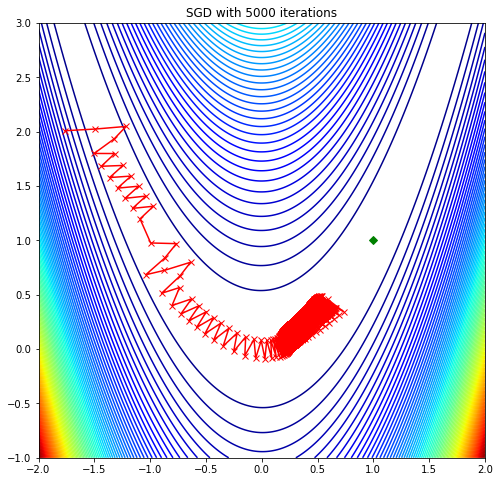

In [5]:
plot_rosenbrok(steps, optimizer_class.__name__)

## Learing rate is too big

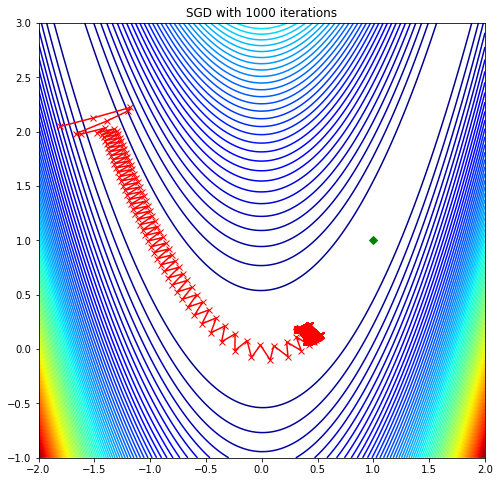

In [31]:
initial_state = np.array([-2,2])
# Try other optimizers!
optimizer_class = torch.optim.SGD
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        # Try some different hyperparameters! Note that these parameters should be wraped in a dict().
        {'lr':0.2, 'momentum':0.5, 'weight_decay':1e-3},
        num_iter=1000,
    )
plot_rosenbrok(steps, optimizer_class.__name__)

## Modified hyperparameters

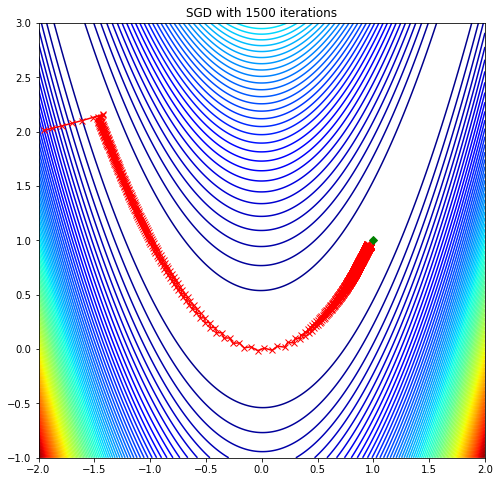

In [74]:
initial_state = np.array([-2,2])
# Try other optimizers!
optimizer_class = torch.optim.SGD
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        # Try some different hyperparameters! Note that these parameters should be wraped in a dict().
        {'lr':0.05, 'momentum':0.5, 'weight_decay':1e-3},
        num_iter=1500,
    )
plot_rosenbrok(steps, optimizer_class.__name__)

In [73]:
printX(steps)

iteration 0: [-1.9514 2.0120]
iteration 1: [-1.8785 2.0302]
iteration 2: [-1.7937 2.0521]
iteration 3: [-1.7030 2.0762]
iteration 4: [-1.6095 2.1021]
iteration 5: [-1.5149 2.1296]
iteration 6: [-1.4198 2.1582]
iteration 7: [-1.4190 2.1549]
iteration 8: [-1.4654 2.1356]
iteration 9: [-1.4394 2.1356]
iteration 10: [-1.4728 2.1168]
iteration 11: [-1.4414 2.1214]
iteration 12: [-1.4716 2.1038]
iteration 13: [-1.4387 2.1093]
iteration 14: [-1.4679 2.0916]
iteration 15: [-1.4345 2.0971]
iteration 16: [-1.4635 2.0794]
iteration 17: [-1.4300 2.0849]
iteration 18: [-1.4589 2.0672]
iteration 19: [-1.4254 2.0727]
iteration 20: [-1.4543 2.0551]
iteration 21: [-1.4208 2.0606]
iteration 22: [-1.4497 2.0431]
iteration 23: [-1.4162 2.0486]
iteration 24: [-1.4452 2.0312]
iteration 25: [-1.4117 2.0368]
iteration 26: [-1.4406 2.0193]
iteration 27: [-1.4072 2.0249]
iteration 28: [-1.4362 2.0075]
iteration 29: [-1.4027 2.0132]
iteration 30: [-1.4317 1.9958]
iteration 31: [-1.3983 2.0015]
iteration 32: [-1.

iteration 1834: [0.9706 0.9390]
iteration 1835: [0.9414 0.9550]
iteration 1836: [0.9709 0.9396]
iteration 1837: [0.9416 0.9556]
iteration 1838: [0.9712 0.9402]
iteration 1839: [0.9419 0.9563]
iteration 1840: [0.9715 0.9410]
iteration 1841: [0.9423 0.9571]
iteration 1842: [0.9718 0.9418]
iteration 1843: [0.9426 0.9580]
iteration 1844: [0.9722 0.9427]
iteration 1845: [0.9431 0.9590]
iteration 1846: [0.9727 0.9437]
iteration 1847: [0.9444 0.9596]
iteration 1848: [0.9745 0.9441]
iteration 1849: [0.9452 0.9596]
iteration 1850: [0.9748 0.9440]
iteration 1851: [0.9452 0.9593]
iteration 1852: [0.9746 0.9437]
iteration 1853: [0.9450 0.9590]
iteration 1854: [0.9744 0.9433]
iteration 1855: [0.9447 0.9586]
iteration 1856: [0.9741 0.9429]
iteration 1857: [0.9445 0.9583]
iteration 1858: [0.9738 0.9426]
iteration 1859: [0.9442 0.9580]
iteration 1860: [0.9736 0.9423]
iteration 1861: [0.9440 0.9577]
iteration 1862: [0.9733 0.9420]
iteration 1863: [0.9438 0.9575]
iteration 1864: [0.9731 0.9418]
iteratio

## Other torch.optim optimizer

### AdaGrad

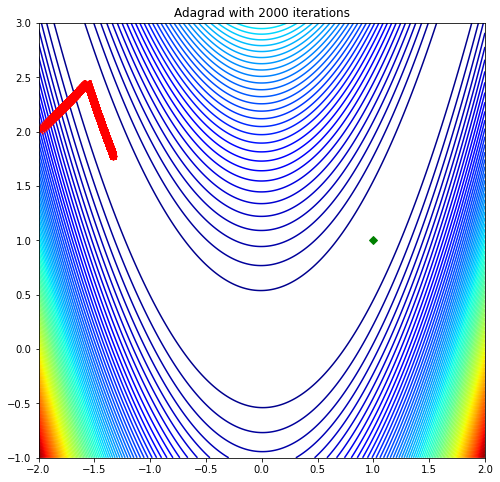

In [66]:
initial_state = np.array([-2,2])
# Try other optimizers!
optimizer_class = torch.optim.Adagrad
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        # Try some different hyperparameters! Note that these parameters should be wraped in a dict().
        {'lr':0.01, 'lr_decay': 0, 'weight_decay':1e-4},
        num_iter=2000,
    )
plot_rosenbrok(steps, optimizer_class.__name__)

#Learning rate is too small

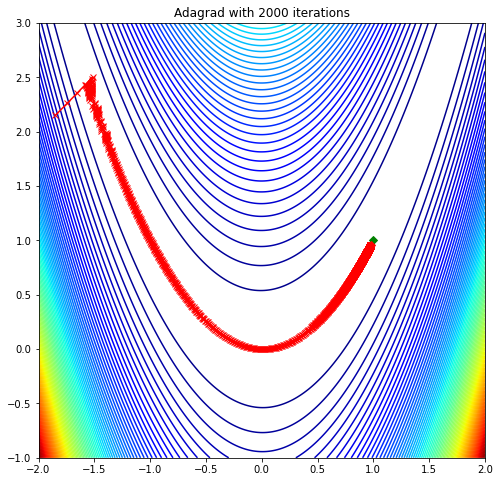

In [67]:
initial_state = np.array([-2,2])
# Try other optimizers!
optimizer_class = torch.optim.Adagrad
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        # Try some different hyperparameters! Note that these parameters should be wraped in a dict().
        {'lr':0.15, 'lr_decay': 0, 'weight_decay':1e-4},
        num_iter=2000,
    )
plot_rosenbrok(steps, optimizer_class.__name__)

### Adam

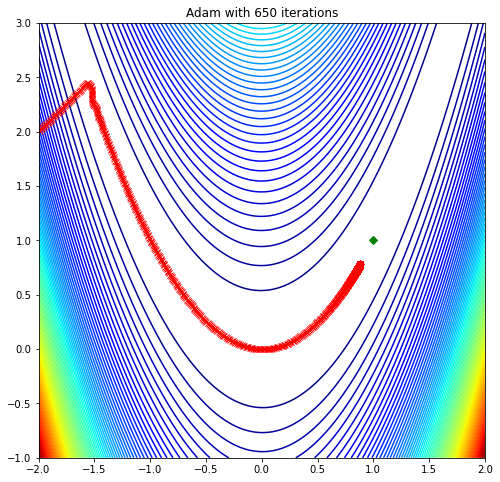

In [70]:
initial_state = np.array([-2,2])
# Try other optimizers!
optimizer_class = torch.optim.Adam
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        # Try some different hyperparameters! Note that these parameters should be wraped in a dict().
        {'lr':1e-2 , 'weight_decay':1e-1},
        num_iter=650,
    )
plot_rosenbrok(steps, optimizer_class.__name__)

#weight_decay is too big

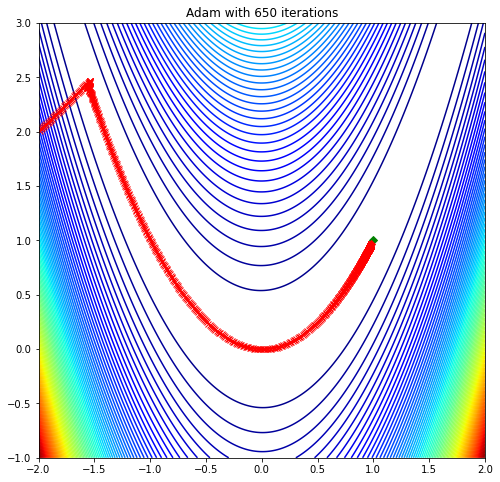

In [63]:
initial_state = np.array([-2,2])
# Try other optimizers!
optimizer_class = torch.optim.Adam
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        # Try some different hyperparameters! Note that these parameters should be wraped in a dict().
        {'lr':1e-2 , 'weight_decay':1e-4},
        num_iter=650,
    )
plot_rosenbrok(steps, optimizer_class.__name__)

## Report

(a)

SGD 的好處是不用等所有的 samples 就開始 learning，因此收歛速度可能一開始比較快。
GD則是需要收到所有samples才能開始做iteration，雖然SGD有速度快的優點但他卻可能得出local最優解，在本題的例子中，由於輸入是one-dimensional的，所以單次只有一個samples，故我認為在此題中，SGD與GD並沒有差別
    
    
(b)

在Original Setting中的結果可以看出weight_decay過大，導致後面的迭代產生不出有效率的更新，且Learning rate也有過大的跡象，導致每次迭代的跨度過大，無法收斂至山谷(例子：上面的Learing rate is too big)，momentum的部分，較有效率的方法是使momentum的參數值隨著時間變化，例如剛開始設置為0.5之後隨著迭代次數慢慢加大到0.99，這樣的設置通常可以改善最後得到的結果(此題採用固定設置便能有不錯效果)。

在實務上，若設備的運算能力足夠，最簡單有效的方式便是採用，暴力GridSearch的方式，去尋找最佳的hyperparameters

若是平常我較常用的方法是先將問題化為較簡單的規模，以這樣的小規模先去做實驗，得到較有效的hyperparameters setting，藉此避免改一次參數原本train兩周的模型就作廢了的情況